In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

In [76]:
df = pd.read_csv('kaggle_no_duplicate.csv', sep=',')

In [79]:
df = df.iloc[:, 1:39]

In [80]:
df_modified = df.drop(columns=['phone_model', 'store', 'launch_date', 'usb', 'year', 'ppi_density', 'quantile_10', 'quantile_50', 'quantile_90', 'price_range', 'os_type', 'os_version', 'battery', 'colors_available', 'chip_company', 'cpu_core', 'gpu_company'])

In [81]:
print(df_modified.columns)

Index(['phone_brand', 'price_usd', 'storage', 'ram', 'dimensions', 'weight',
       'display_type', 'display_size', 'display_resolution', 'os', 'nfc',
       'features_sensors', 'colors', 'video', 'chipset', 'cpu', 'gpu',
       'foldable', 'battery_size', 'fingerprint', 'video_resolution'],
      dtype='object')


In [82]:
cat_cols = df_modified.iloc[:, [0, 4, 6, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20]]

In [ ]:
encoded_categorical = pd.get_dummies(cat_cols)
numerical_cols = [1, 2, 3, 5, 7, 10, 17]
scaler = StandardScaler()
df_modified.iloc[:, numerical_cols] = scaler.fit_transform(df_modified.iloc[:,numerical_cols])
numerical = df_modified.iloc[:, [1, 2, 3, 5, 7, 10, 17]]
combined_data = pd.concat([numerical, encoded_categorical], axis=1)
numerical_data = combined_data.to_numpy()

In [84]:
combined_data

,price_usd,storage,ram,weight,display_size,nfc,foldable,phone_brand_apple,phone_brand_asus,phone_brand_blackview,...,battery_size_Super Large,fingerprint_Accelerometer,fingerprint_Face,fingerprint_front,fingerprint_rear,fingerprint_side,fingerprint_under,video_resolution_1080p,video_resolution_4K,video_resolution_8K
0,2.739723,-0.071259,0.032295,0.115622,-0.681599,0.354547,-0.208514,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,3.127054,1.158007,0.032295,0.115622,-0.681599,0.354547,-0.208514,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,3.737515,3.501296,0.032295,0.115622,-0.681599,0.354547,-0.208514,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,3.334691,1.158007,0.032295,1.110085,0.785432,0.354547,-0.208514,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,-0.445653,-0.685892,-1.124535,-2.157436,-2.882146,0.354547,-0.208514,True,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,4.580116,1.158007,1.189125,-0.204027,0.687630,0.354547,4.795832,False,False,False,...,False,False,False,False,False,True,False,False,False,True
596,-0.524840,-0.071259,0.032295,-0.310576,0.223070,0.354547,-0.208514,False,False,False,...,False,False,False,False,False,False,True,False,True,False
597,-1.004240,-0.993209,-1.124535,0.009072,-0.119237,-2.820501,-0.208514,False,False,False,...,False,True,False,False,False,False,False,True,False,False
598,-0.951248,-0.685892,-1.124535,0.009072,-0.119237,-2.820501,-0.208514,False,False,False,...,False,True,False,False,False,False,False,True,False,False


In [96]:
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(numerical_data)
labels = kmeans.labels_

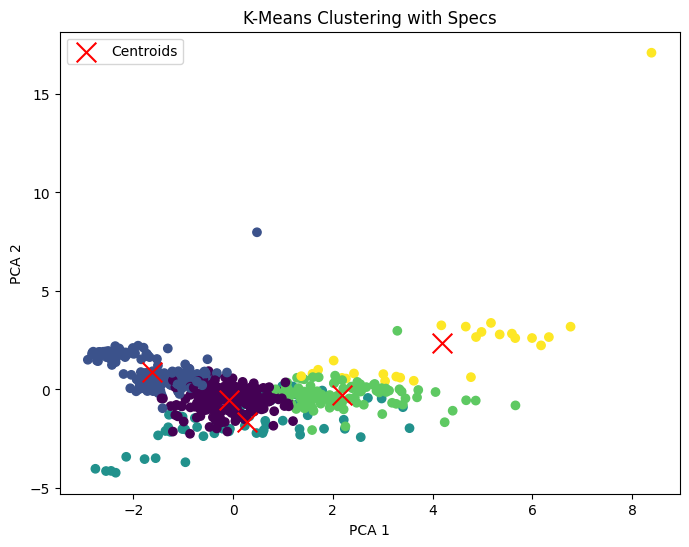

In [98]:
pca2 = PCA(n_components=2)
reduced_features = pca2.fit_transform(numerical_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')

centroids = pca2.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title('K-Means Clustering with Specs')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [90]:
def get_top_neighbors(row_index, df, clusters, n_neighbors):
  cluster_label = clusters[row_index]
  same_cluster_rows = np.where(clusters == cluster_label)[0]
  row_vector = df.iloc[row_index].values.reshape(1, -1)
  distances = euclidean_distances(row_vector, df.iloc[same_cluster_rows])
  nearest_neighbors = same_cluster_rows[np.argsort(distances[0])][1:n_neighbors+1]

  return nearest_neighbors

In [127]:
print(get_top_neighbors(89, combined_data, labels, 5))

[ 91  90  84 566  83]


In [132]:
df.iloc[83]

,83
phone_brand,google
phone_model,Google Pixel 8 Pro
store,Amazon DE
price_usd,648.24
storage,256
ram,12
launch_date,2023-10-12
dimensions,162.6 x 76.5 x 8.8 mm (6.40 x 3.01 x 0.35 in)
weight,213.0
display_type,"LTPO OLED, 120Hz, HDR10+, 1600 nits (HBM), 240..."
